# **`RANDOM FOREST CLASSIFIER IMPLEMENTATION WITH PIPELINE AND HYPERPARAMETER TUNING`**

In [113]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [114]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [115]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [116]:
## handling missing values
## handling categorical features
## handling outliers not required here in this dataset
## Feature scaling
## Automating the entire process

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [118]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [119]:
df["time"] = encoder.fit_transform(df["time"])

In [120]:
df.time.value_counts()

0    176
1     68
Name: time, dtype: int64

In [121]:
## independent and dependent features
X = df.drop("time",axis=1)
y = df["time"]

In [122]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [123]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size= .2 , random_state= 42)

In [124]:
X_train.shape , X_test.shape

((195, 6), (49, 6))

In [125]:
from sklearn.impute import SimpleImputer ## handling missing values
from sklearn.preprocessing import OneHotEncoder## handling categorical features
## handling outliers not required here in this dataset
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Automating the entire process

In [126]:
categorical_cols = []
numerical_cols = []
for i in df.columns:
    if df[i].dtype == "category":
        categorical_cols.append(i)
    elif i == "time":
            continue
    else:
        numerical_cols.append(i)


In [127]:
## Feature Engineering Automation
num_pipeline = Pipeline(
    steps= [
    ("imputer", SimpleImputer(strategy="median")), ## missing values
    ("scaler", StandardScaler()), ## feature scaling

    ]
)
cat_pipeline = Pipeline(
    steps= [
    ("imputer", SimpleImputer(strategy="most_frequent")), ## handling  missing values
    ("onehotencoder",OneHotEncoder()), ## Categrorical features to numerical
    ]
)



In [128]:
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_cols),
    ("cat_pipeline",cat_pipeline,categorical_cols)
])

In [129]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [131]:
## Automate my model training process
models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVC" : SVC()
}

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        #train model
        model.fit(X_train,y_train)

        #Predict Testing data
        y_test_pred = model.predict(X_test)

        #Get accuracy for test data prediction

        test_model_score = accuracy_score(y_test,y_test_pred)

        report[list(models.keys())[i]] = test_model_score
    
    return report


In [134]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 0.9591836734693877,
 'Decision Tree': 0.9387755102040817,
 'SVC': 0.9591836734693877}

In [135]:
classifer = RandomForestClassifier()

In [136]:
## Hyperparameter tuning
params = {
    "max_depth" : [3,5,10,None],
    "n_estimators" : [100,200,300],
    "criterion" : ["gini" , "entropy"]
}

In [137]:
from sklearn.model_selection import RandomizedSearchCV

In [138]:
cv = RandomizedSearchCV(classifer,param_distributions=params,cv=5,scoring="accuracy",verbose=3)

In [139]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.974 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.923 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=1.000 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.949 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=10, n_estimators=200;, score=0.923 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.974 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.923 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=1.000 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.949 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=100;, score=0.923 tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [140]:
# Internal Assignment 
# Decision Regression

# **`RANDOM FOREST REGRESSOR WITH PIPELINE AND HYPERPARAMETER TUNING`**

In [141]:
## Prediciting tip from tips dataset
import seaborn as sns
df = sns.load_dataset("tips")

In [142]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [144]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

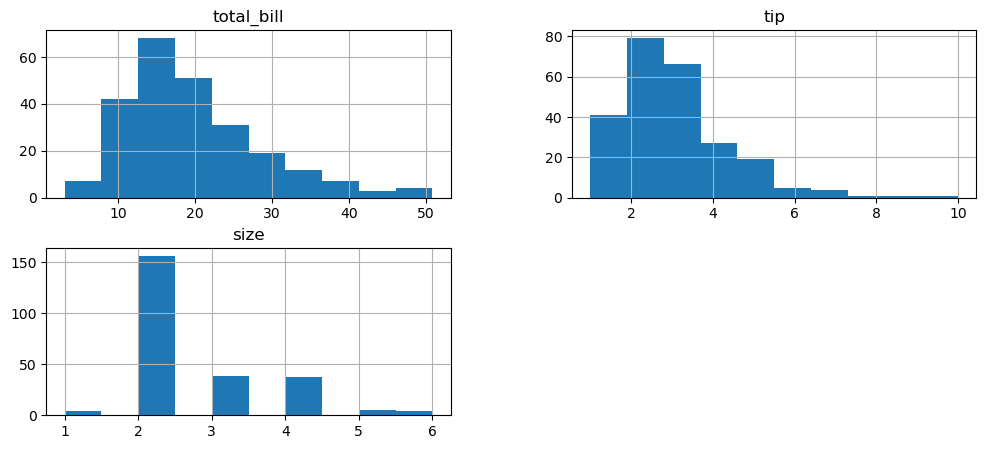

In [145]:
df.hist(grid=True,figsize=(12,5))

In [146]:
## separating dependent and independent variables

X = df.drop("tip",axis = 1)
y = df.tip

In [147]:
X.shape,y.shape

((244, 6), (244,))

In [148]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size= .2 , random_state= 42)

In [149]:
X_train.shape , y_train.shape

((195, 6), (195,))

In [150]:
from sklearn.impute import SimpleImputer ## handling missing values
from sklearn.preprocessing import OneHotEncoder## handling categorical features
## handling outliers not required here in this dataset
from sklearn.preprocessing import StandardScaler## Feature scaling
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## Automating the entire process

In [151]:
categorical_cols = []
numerical_cols = []
for i in df.columns:
    if df[i].dtype == "category":
        categorical_cols.append(i)
    elif i == "tip":
            continue
    else:
        numerical_cols.append(i)


In [152]:
## Feature Engineering Automation
num_pipeline = Pipeline(
    steps= [
    ("imputer", SimpleImputer(strategy="median")), ## missing values
    ("scaler", StandardScaler()), ## feature scaling

    ]
)
cat_pipeline = Pipeline(
    steps= [
    ("imputer", SimpleImputer(strategy="most_frequent")), ## handling  missing values
    ("onehotencoder",OneHotEncoder()), ## Categrorical features to numerical
    ]
)



In [153]:
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_cols),
    ("cat_pipeline",cat_pipeline,categorical_cols)
])

In [154]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [156]:
## Automate my model training process
models = {
    "Random Forest" : RandomForestRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "SVR" : SVR()
}

In [157]:
from sklearn.metrics import r2_score , mean_absolute_error

In [158]:
def evaluate_model(X_train,y_train,X_test,y_test,models):

    mae = {}
    r2score = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        #train model
        model.fit(X_train,y_train)

        #Predict Testing data
        y_test_pred = model.predict(X_test)

        #Get r2 score for test data prediction
        
        test_model_mae = mean_absolute_error(y_test,y_test_pred)
        test_model_r2 = r2_score(y_test,y_test_pred)

        mae[list(models.keys())[i]] = test_model_mae
        r2score[list(models.keys())[i]] = test_model_r2
    
    return {"Mean Absolute error" : mae} , {"R2 scores" : r2score}


In [159]:
evaluate_model(X_train,y_train,X_test,y_test,models)

({'Mean Absolute error': {'Random Forest': 0.7403591836734695,
   'Decision Tree': 0.8530612244897958,
   'SVR': 0.6635567692192565}},
 {'R2 scores': {'Random Forest': 0.3102847249542937,
   'Decision Tree': 0.019082819791087613,
   'SVR': 0.42558767775531936}})

## Hyperparameter tuning

In [162]:
regressor = RandomForestRegressor()

In [170]:
params = {
    "max_depth" : [3,5,10,None],
    "n_estimators" : [100,200,300],
    "criterion" : ["squared_error" , "absolute_error","friedman_mse","poisson"],
}

In [171]:
from sklearn.model_selection import GridSearchCV
reg = GridSearchCV(regressor,param_grid=params,cv=10,scoring="r2",verbose=3)

In [172]:
reg.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.233 total time=   0.0s
[CV 2/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=-0.109 total time=   0.0s
[CV 3/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.336 total time=   0.0s
[CV 4/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.682 total time=   0.1s
[CV 5/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.685 total time=   0.0s
[CV 6/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.445 total time=   0.1s
[CV 7/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.404 total time=   0.0s
[CV 8/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.634 total time=   0.1s
[CV 9/10] END criterion=squared_error, max_depth=3, n_estimators=100;, score=0.077 total time=   0.0s
[CV 10/10] END cri

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [3, 5, 10, None],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=3)

In [173]:
reg.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 200}

In [175]:
regressor = RandomForestRegressor(criterion="absolute_error", max_depth=5 , n_estimators = 200)

In [176]:
regressor.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=200)

In [177]:
y_pred_forest = regressor.predict(X_test)

In [178]:
print("Mean absolute error" , mean_absolute_error(y_test,y_pred_forest))
print("R2", r2_score(y_test,y_pred_forest))

Mean absolute error 0.7062295918367351
R2 0.3793550771447084
